## Model comparison

In [1]:
import json
import itertools
from mira.metamodel import *
from mira.sources.amr.petrinet import template_model_from_amr_json
from mira.metamodel.utils import is_ontological_child

In [2]:
models = {}
for model_key in ['A', 'B', 'C']:
    fname = f'Model{model_key}_base_petri.json'
    with open(fname, 'r') as fh:
        jj = json.load(fh)
        models[model_key] = template_model_from_amr_json(jj)

### Concept context comparison

In [3]:
comp = TemplateModelComparison(models.values(), is_ontological_child,
                               tags=['A', 'B', 'C'], run_on_init=False)
comp.compare_context()

A  B  C
Context Values          
hospitalization  1      
quarantined         2   
severity         2      
sex                    2
species          2  2  1
stage            3

### Tabular concept conparison

In [4]:
get_concept_comparison_table(models['B'], models['A'], name_only=True)

S_h  Q I_r I_h  R E_h E_r S_r
S_l   <                          
S_h   <                          
E_h      >              >        
I_r          =                   
H                <               
P                <               
I2               <               
I1               <               
R_h                 =            
E_r                         =    
S_r                             =

In [5]:
get_concept_comparison_table(models['B'], models['A'], name_only=False)

S_h (ido:0000514) [species: ncbitaxon:9606]  \
S_l (ido:0000514) [severity: low, species: ncbi...                                           <   
S_h (ido:0000514) [severity: high, species: ncb...                                           <   
E_h (apollosv:00000154) [species: ncbitaxon:9606]                                                
I_r (ido:0000511) [species: ncbitaxon:9989]                                                      
H (ido:0000511) [hospitalization: ncit:C25179, ...                                               
P (ido:0000511) [stage: predromal, species: ncb...                                               
I2 (ido:0000511) [stage: severe, species: ncbit...                                               
I1 (ido:0000511) [stage: mild, species: ncbitax...                                               
R_h (ido:0000592) [species: ncbitaxon:9606]                                                      
E_r (apollosv:00000154) [species: ncbitaxon:9989]                                                
S_r (ido:0000514) [species: ncbitaxon:9989]                                                      

                                                   Q (apollosv:00000154) [quarantined: ncit:C71902, species: ncbitaxon:9606]  \
S_l (ido:0000514) [severity: low, species: ncbi...                                                                             
S_h (ido:0000514) [severity: high, species: ncb...                                                                             
E_h (apollosv:00000154) [species: ncbitaxon:9606]                                                   >                          
I_r (ido:0000511) [species: ncbitaxon:9989]                                                                                    
H (ido:0000511) [hospitalization: ncit:C25179, ...                                                                             
P (ido:0000511) [stage: predromal, species: ncb...                                                                             
I2 (ido:0000511) [stage: severe, species: ncbit...                                                                             
I1 (ido:0000511) [stage: mild, species: ncbitax...                                                                             
R_h (ido:0000592) [species: ncbitaxon:9606]                                                                                    
E_r (apollosv:00000154) [species: ncbitaxon:9989]                                                                              
S_r (ido:0000514) [species: ncbitaxon:9989]                                                                                    

                                                   I_r (ido:0000511) [species: ncbitaxon:9989]  \
S_l (ido:0000514) [severity: low, species: ncbi...                                               
S_h (ido:0000514) [severity: high, species: ncb...                                               
E_h (apollosv:00000154) [species: ncbitaxon:9606]                                                
I_r (ido:0000511) [species: ncbitaxon:9989]                                                  =   
H (ido:0000511) [hospitalization: ncit:C25179, ...                                               
P (ido:0000511) [stage: predromal, species: ncb...                                               
I2 (ido:0000511) [stage: severe, species: ncbit...                                               
I1 (ido:0000511) [stage: mild, species: ncbitax...                                               
R_h (ido:0000592) [species: ncbitaxon:9606]                                                      
E_r (apollosv:00000154) [species: ncbitaxon:9989]                                                
S_r (ido:0000514) [species: ncbitaxon:9989]                                                      

                                                   I_h (ido:0000511) [species: ncbitaxon:9606]  \
S_l (ido:0000514) [severity: low, species: ncbi...            

In [6]:
get_concept_comparison_table(models['A'], models['C'])

E_h (apollosv:00000154) [species: ncbitaxon:9606]  \
E_m (apollosv:00000154) [species: ncbitaxon:960...                                                 <   
E_w (apollosv:00000154) [species: ncbitaxon:960...                                                 <   
R_m (ido:0000592) [species: ncbitaxon:9606, sex...                                                     
R_w (ido:0000592) [species: ncbitaxon:9606, sex...                                                     

                                                   R_h (ido:0000592) [species: ncbitaxon:9606]  
E_m (apollosv:00000154) [species: ncbitaxon:960...                                              
E_w (apollosv:00000154) [species: ncbitaxon:960...                                              
R_m (ido:0000592) [species: ncbitaxon:9606, sex...                                           <  
R_w (ido:0000592) [species: ncbitaxon:9606, sex...                                           <

In [7]:
get_concept_comparison_table(models['B'], models['C'])

S_h (ido:0000514) [species: ncbitaxon:9606]  \
S_m (ido:0000514) [species: ncbitaxon:9606, sex...                                           <   
S_w (ido:0000514) [species: ncbitaxon:9606, sex...                                           <   
I_m (ido:0000511) [species: ncbitaxon:9606, sex...                                               
I_w (ido:0000511) [species: ncbitaxon:9606, sex...                                               
R_m (ido:0000592) [species: ncbitaxon:9606, sex...                                               
R_w (ido:0000592) [species: ncbitaxon:9606, sex...                                               

                                                   I_h (ido:0000511) [species: ncbitaxon:9606]  \
S_m (ido:0000514) [species: ncbitaxon:9606, sex...                                               
S_w (ido:0000514) [species: ncbitaxon:9606, sex...                                               
I_m (ido:0000511) [species: ncbitaxon:9606, sex...                                           <   
I_w (ido:0000511) [species: ncbitaxon:9606, sex...                                           <   
R_m (ido:0000592) [species: ncbitaxon:9606, sex...                                               
R_w (ido:0000592) [species: ncbitaxon:9606, sex...                                               

                                                   R (ido:0000592) [species: ncbitaxon:9606]  
S_m (ido:0000514) [species: ncbitaxon:9606, sex...                                            
S_w (ido:0000514) [species: ncbitaxon:9606, sex...                                            
I_m (ido:0000511) [species: ncbitaxon:9606, sex...                                            
I_w (ido:0000511) [species: ncbitaxon:9606, sex...                                            
R_m (ido:0000592) [species: ncbitaxon:9606, sex...                                         <  
R_w (ido:0000592) [species: ncbitaxon:9606, sex...                                         <

### Concept graph comparison

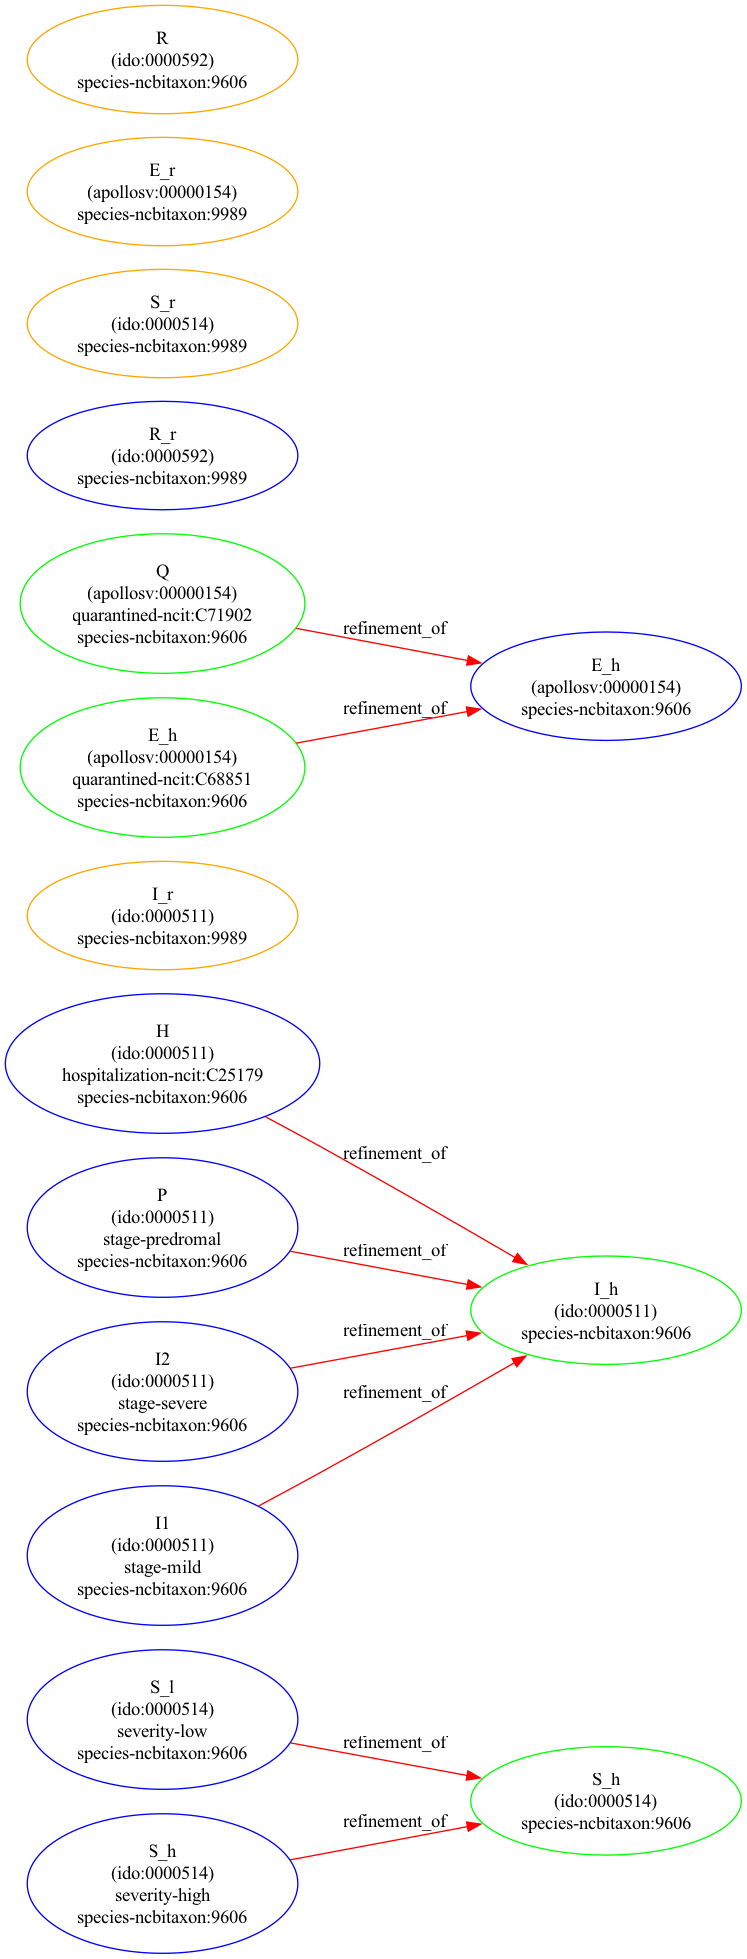

In [8]:
td = TemplateModelDelta(
    template_model1=models['A'],
    template_model2=models['B'],
    refinement_function=is_ontological_child,
    concepts_only=True,
)

td.draw_jupyter(name='models_A_B_compare.png',
               args="-Grankdir=LR")

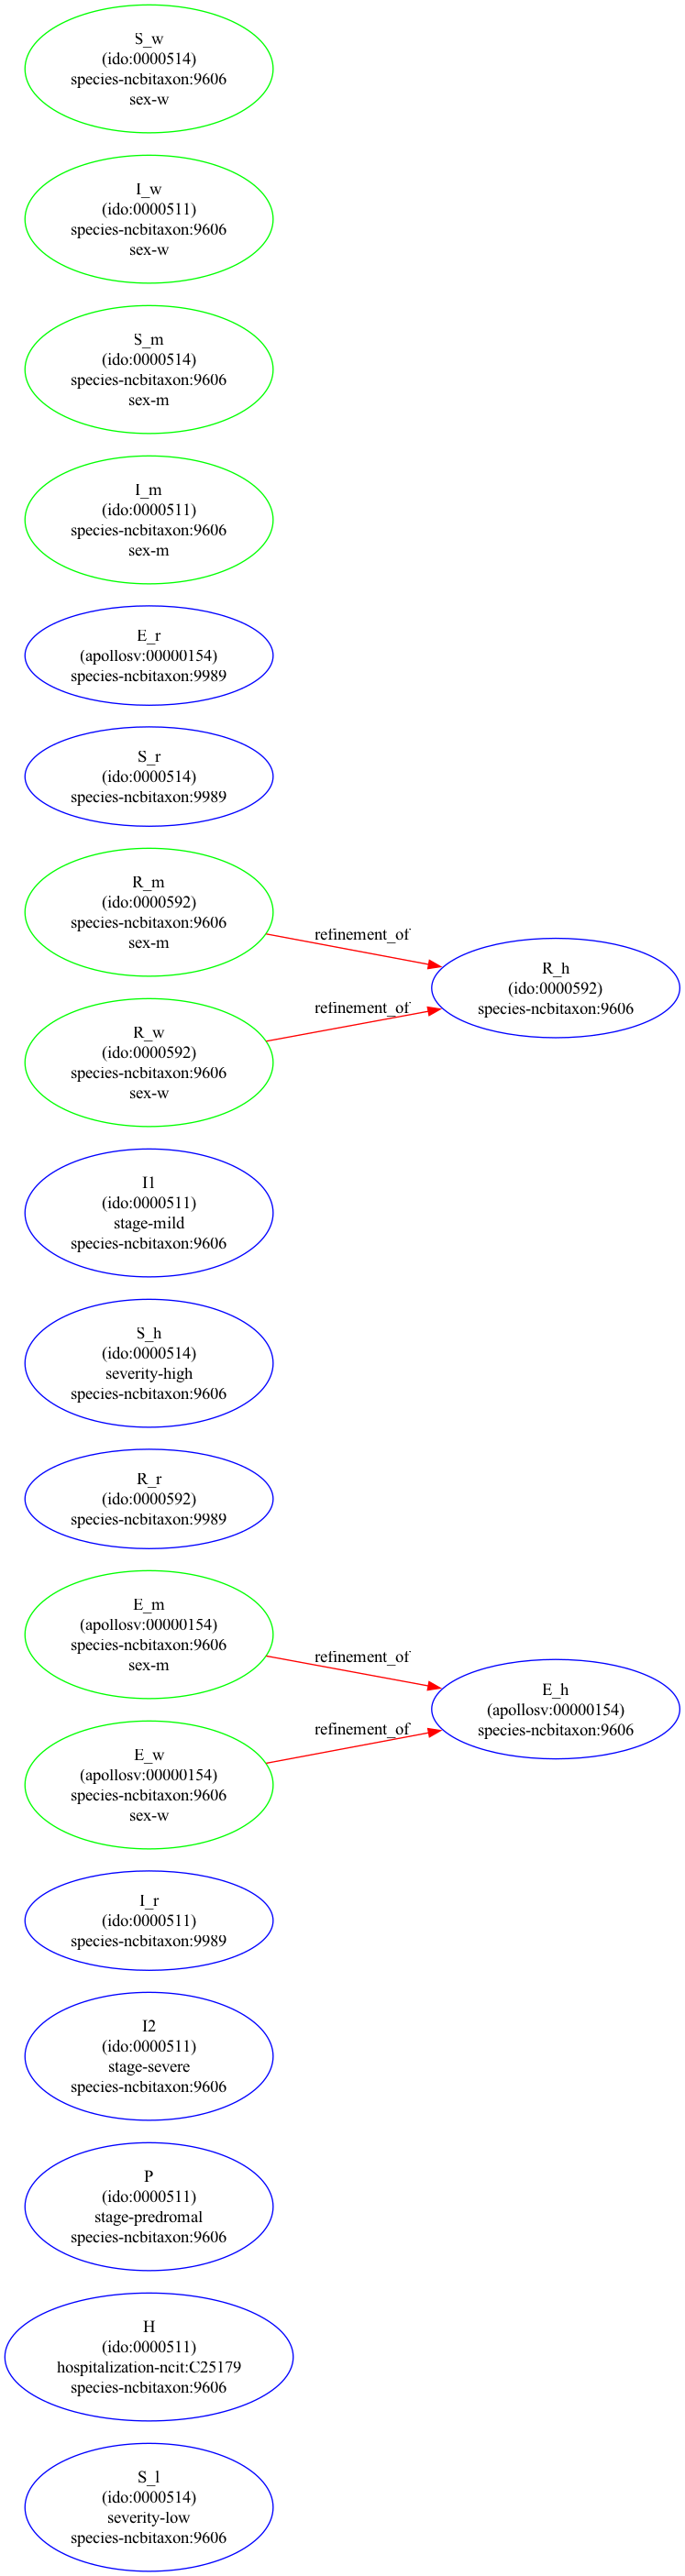

In [10]:
td_ac = TemplateModelDelta(
    template_model1=models['A'],
    template_model2=models['C'],
    refinement_function=is_ontological_child,
    concepts_only=True,
)

td_ac.draw_jupyter(name='models_A_C_compare.png',
                   args="-Grankdir=LR")

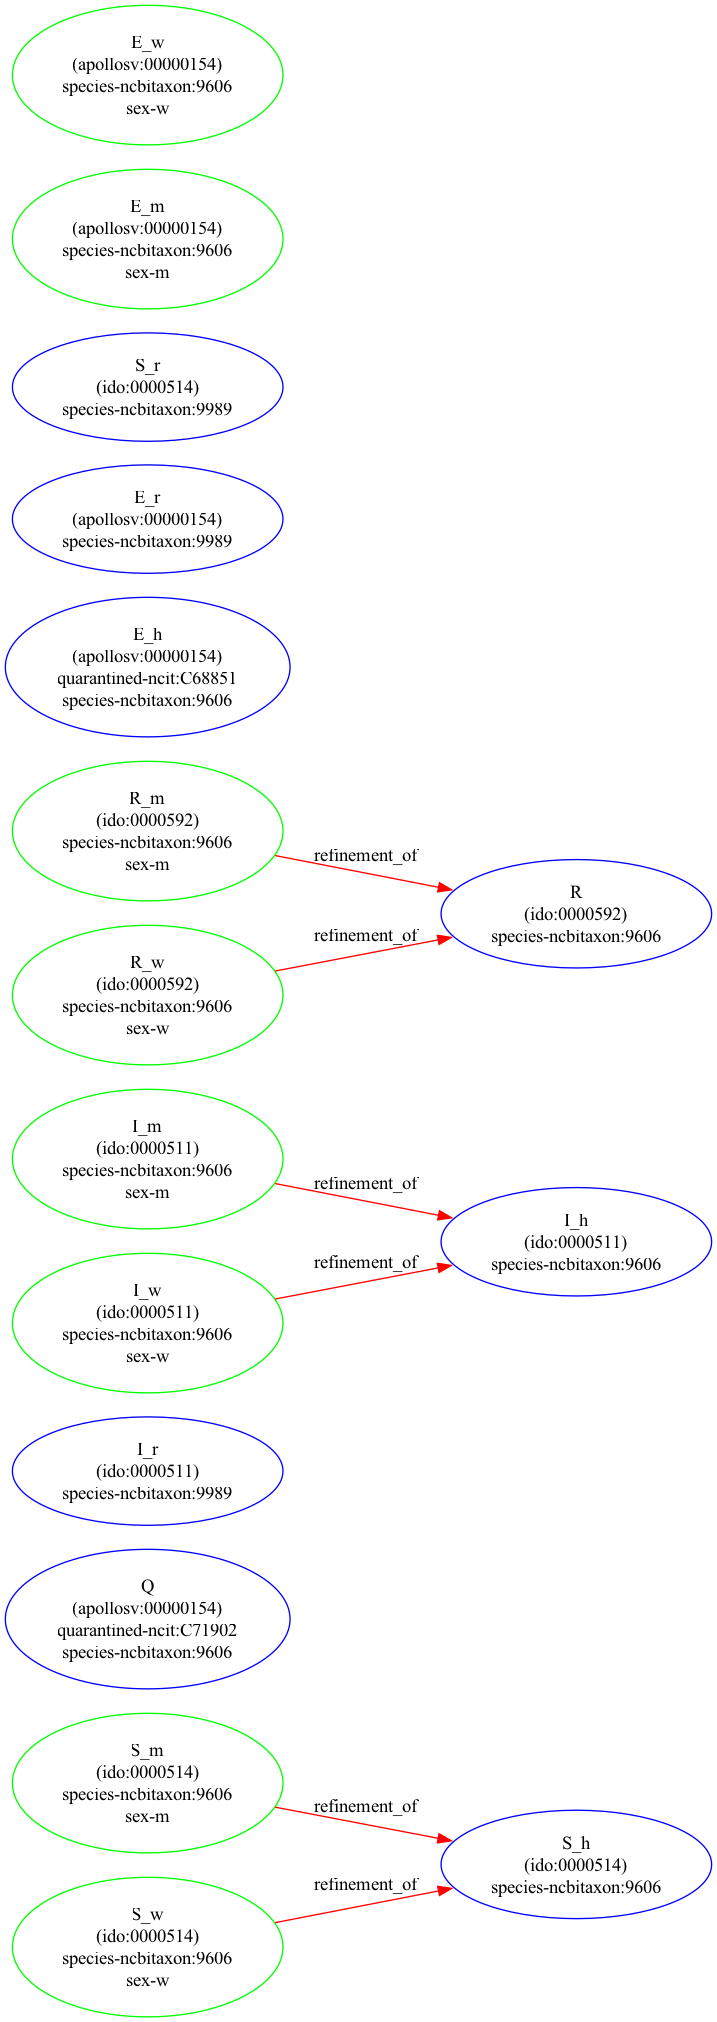

In [11]:
td_bc = TemplateModelDelta(
    template_model1=models['B'],
    template_model2=models['C'],
    refinement_function=is_ontological_child,
    concepts_only=True,
)

td_bc.draw_jupyter(name='models_B_C_compare.png',
               args="-Grankdir=LR")

### Full comparison

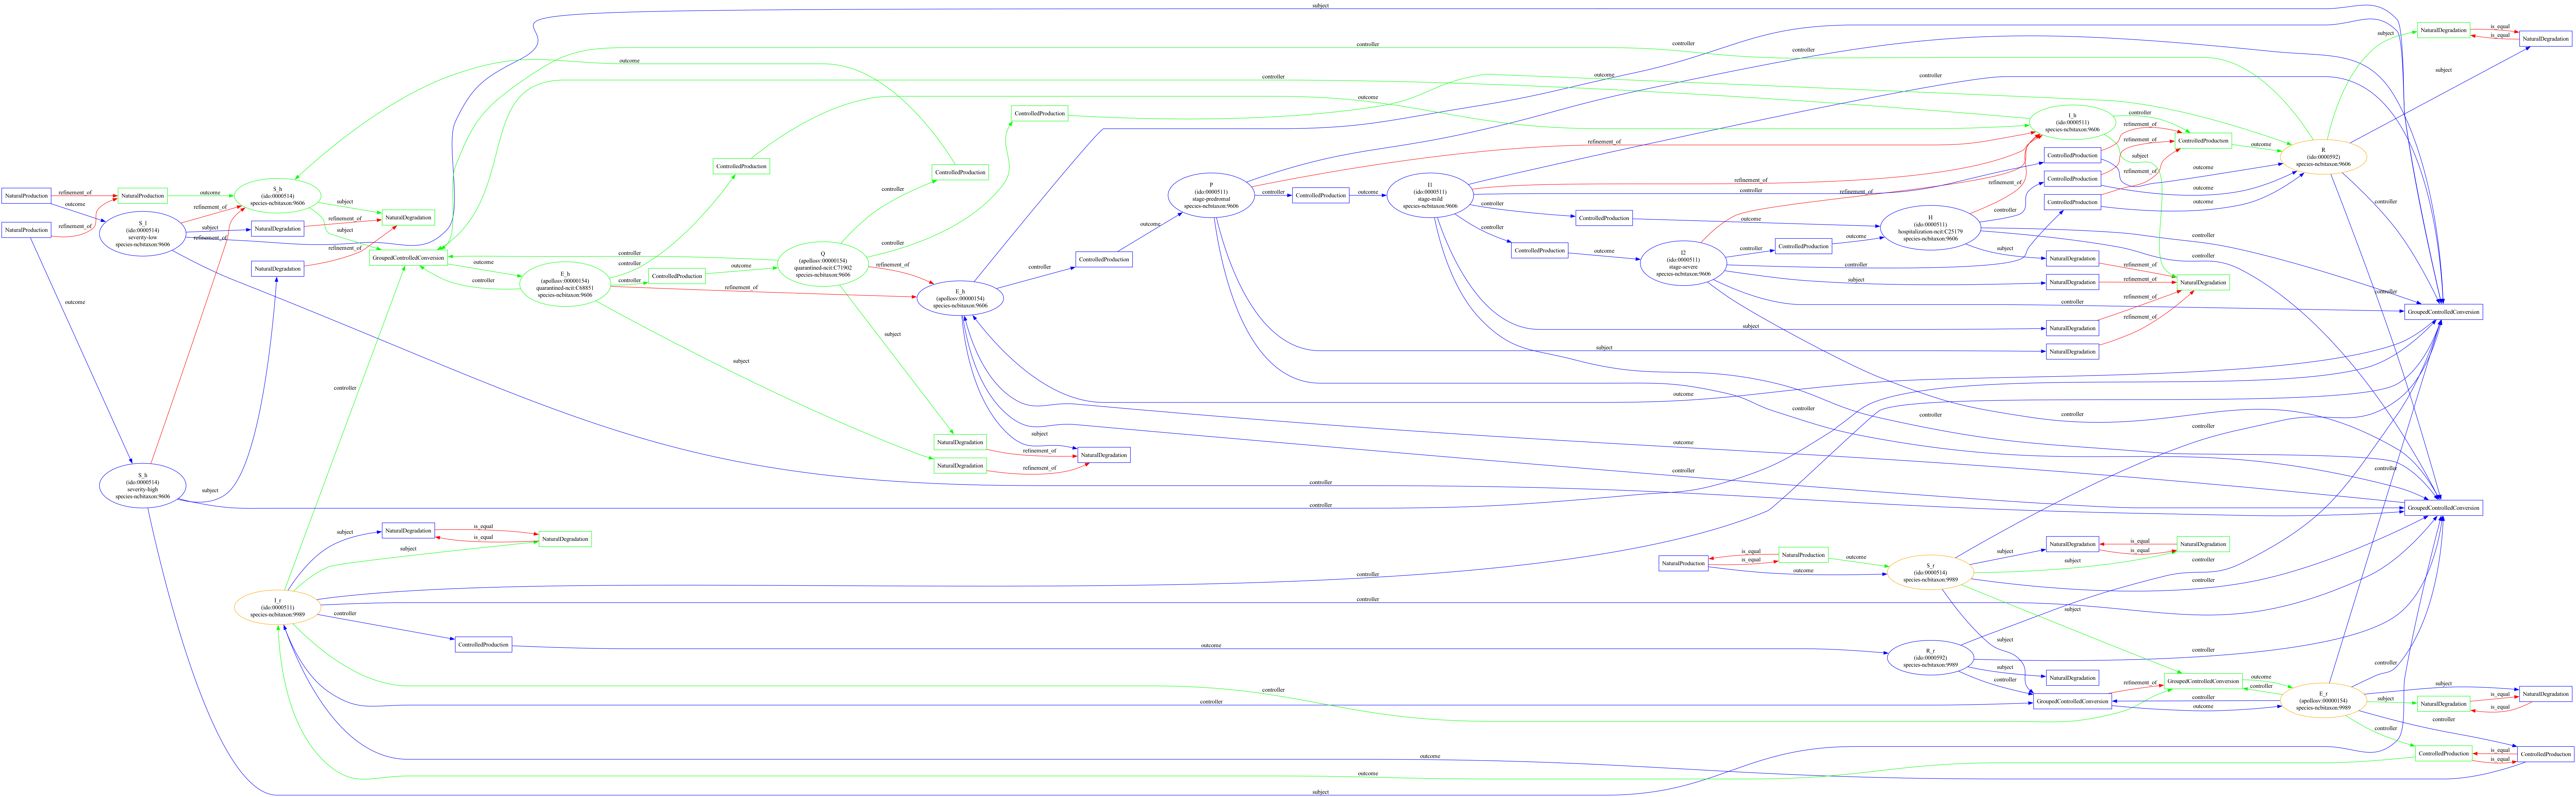

In [12]:
td = TemplateModelDelta(
    template_model1=models['A'],
    template_model2=models['B'],
    refinement_function=is_ontological_child,
)

td.draw_jupyter(name='models_A_B_compare_full.png',
               args="-Grankdir=LR")

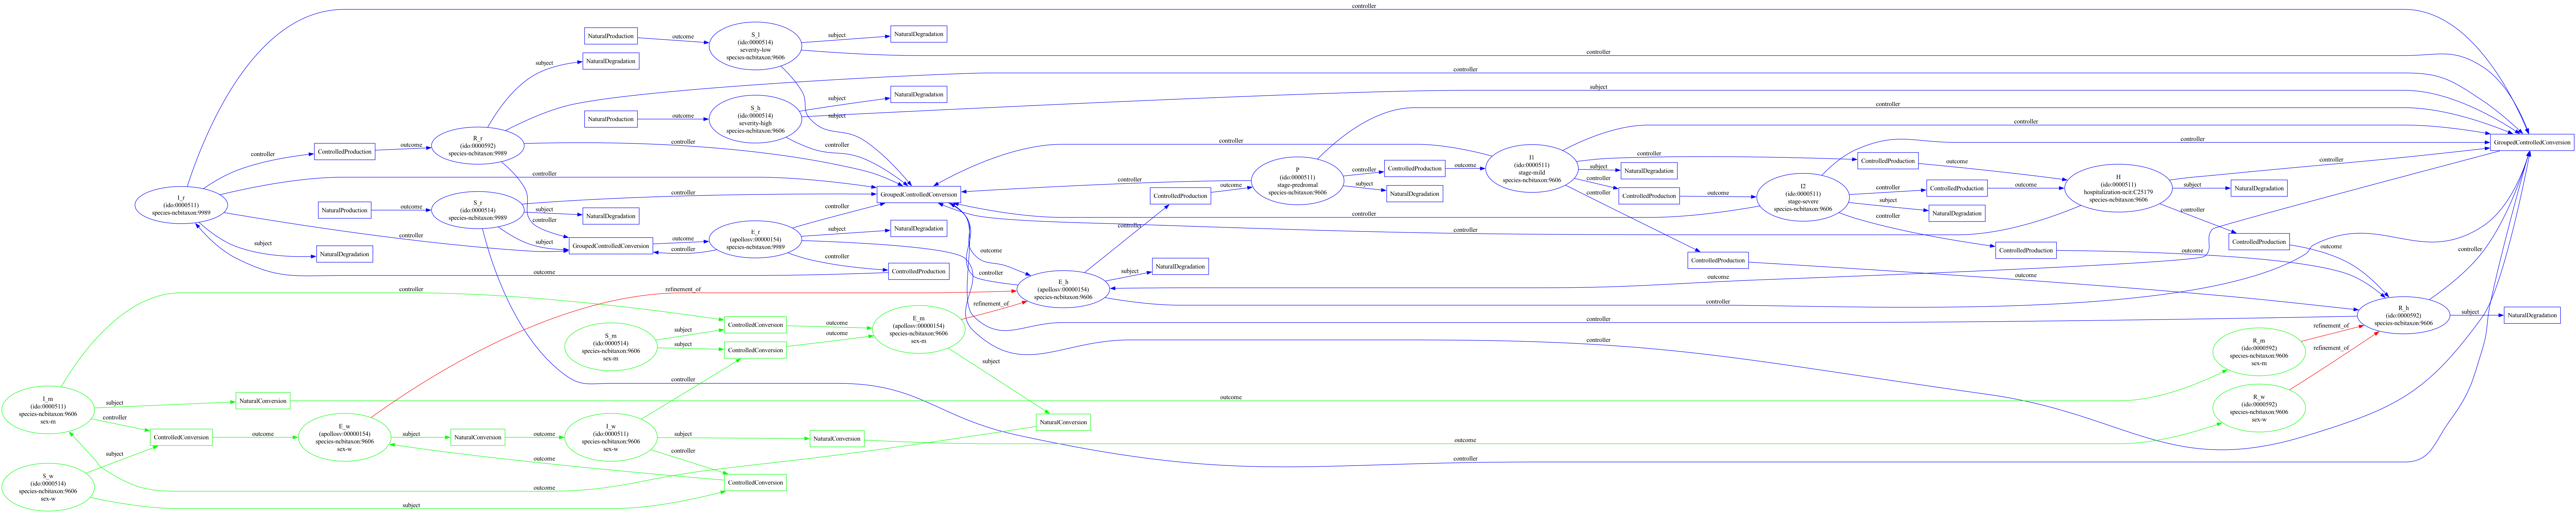

In [13]:
td_ac = TemplateModelDelta(
    template_model1=models['A'],
    template_model2=models['C'],
    refinement_function=is_ontological_child,
)

td_ac.draw_jupyter(name='models_A_C_compare_full.png',
                   args="-Grankdir=LR")

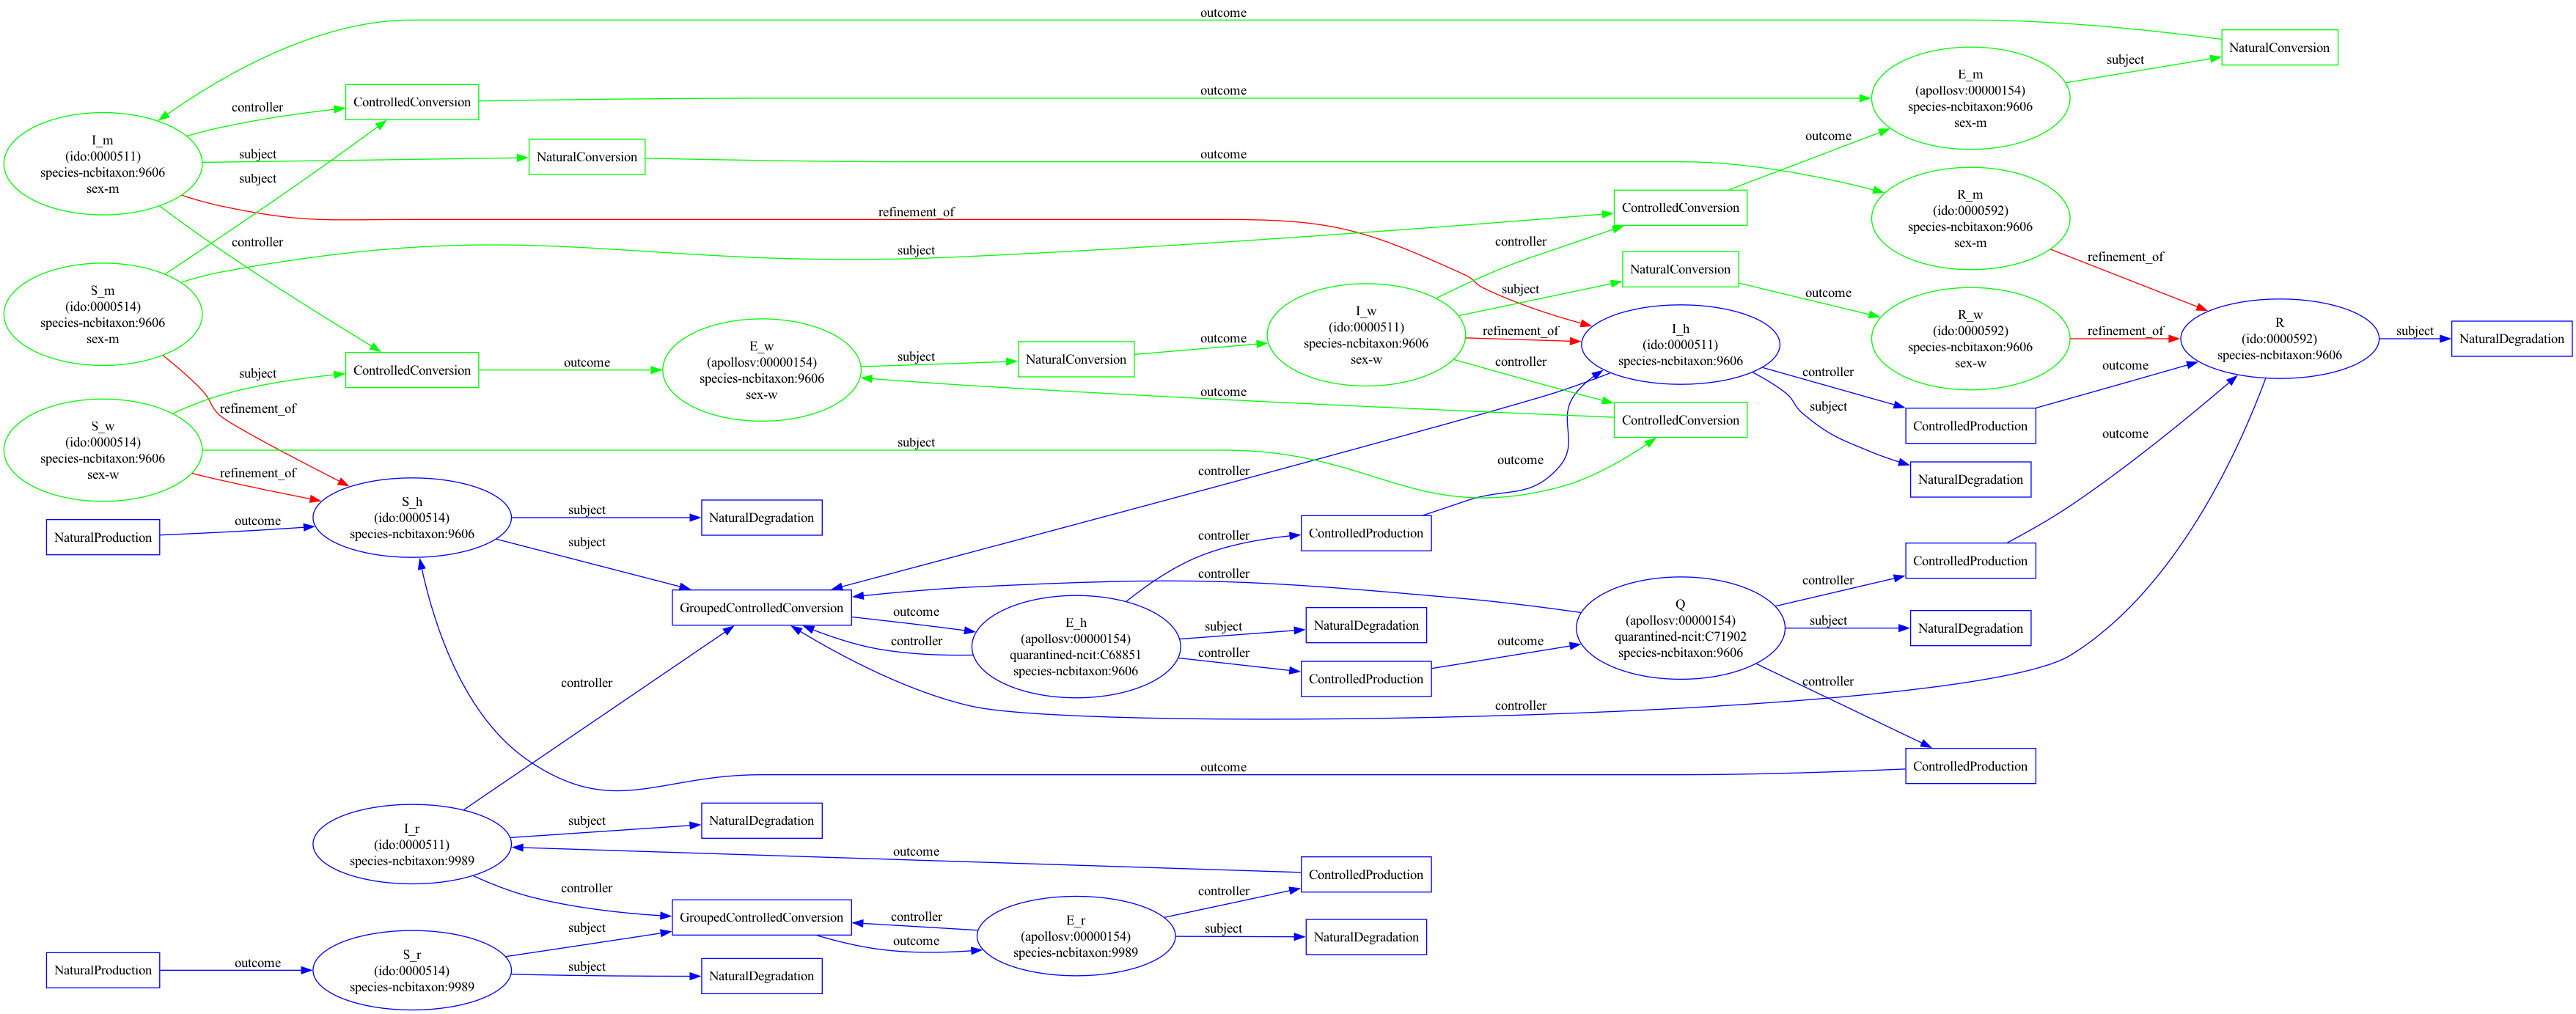

In [14]:
td_bc = TemplateModelDelta(
    template_model1=models['B'],
    template_model2=models['C'],
    refinement_function=is_ontological_child,
)

td_bc.draw_jupyter(name='models_B_C_compare_full.png',
               args="-Grankdir=LR")